# Imports

In [7]:
import matplotlib.pyplot as plt
import altair as alt
from IPython.display import display, HTML, clear_output

# Import from our library
from graph_search import *
from word_ladder import *
from n_puzzle import *

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [8]:
WordLadderGame.generate_word_list_files()

Word list file for 3-letter words already exists, skipping.
Word list file for 4-letter words already exists, skipping.
Word list file for 5-letter words already exists, skipping.


# Graph Traversal

## Small Graph

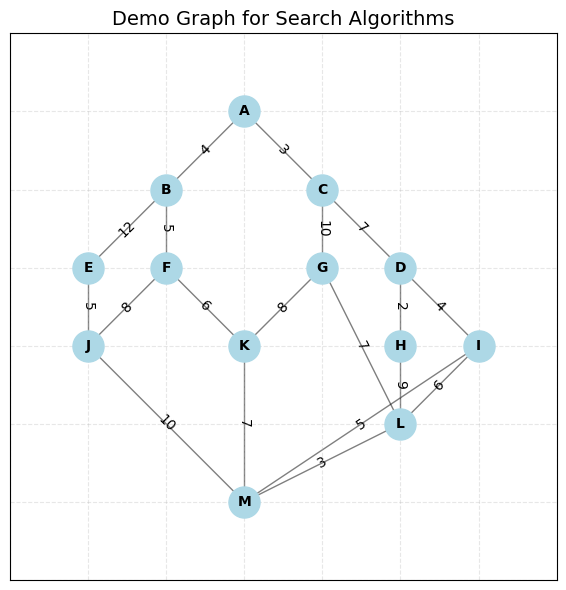

In [9]:
# Create a demo graph
demo_graph = create_demo_graph()

# Visualize the graph
fig = visualize_graph(demo_graph, title="Demo Graph for Search Algorithms")
plt.show()

### Run Search Algorithms

* Algorithms: `'bfs', 'dfs', 'ucs', 'greedy', 'astar'`
* Possible Nodes: `'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'`
* Heuristics: `'None', 'euclidean', 'manhattan'`


Running BFS search from A to M...
✓ Path found! Length: 4, Cost: 31
Path: A -> B -> E -> J -> M
Nodes visited: 13
Max frontier size: 7
Time taken: 0.000036 seconds


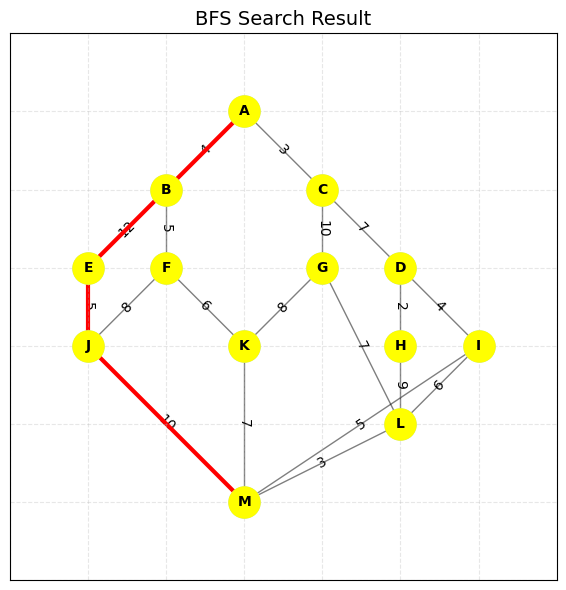

(['A', 'B', 'E', 'J', 'M'],
 ['A', 'B', 'C', 'E', 'F', 'D', 'G', 'J', 'K', 'H', 'I', 'L', 'M'],
 {'time': 3.62396240234375e-05,
  'space': 7,
  'path_cost': 31,
  'nodes_visited': 13})

In [10]:
run_graph_search_example(
    graph=demo_graph,
    algo='bfs',
    start='A',
    goal='M',
    heuristic='None'
)


Running DFS search from A to M...
✓ Path found! Length: 4, Cost: 23
Path: A -> C -> G -> L -> M
Nodes visited: 5
Max frontier size: 6
Time taken: 0.000024 seconds


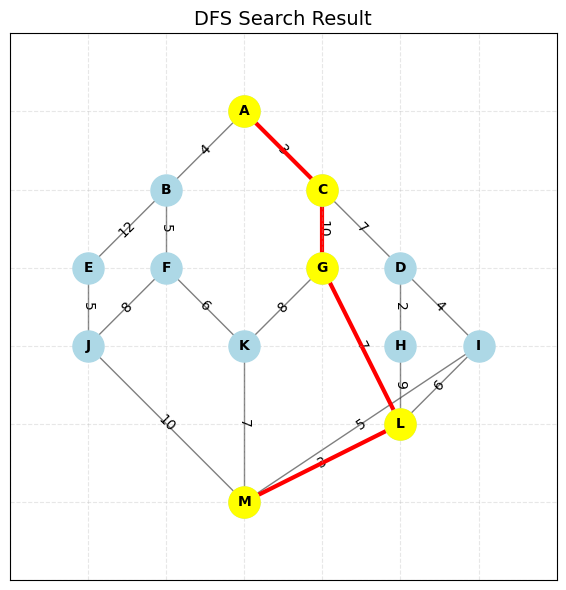

(['A', 'C', 'G', 'L', 'M'],
 ['A', 'C', 'G', 'L', 'M'],
 {'time': 2.4080276489257812e-05,
  'space': 6,
  'path_cost': 23,
  'nodes_visited': 5})

In [11]:
run_graph_search_example(
    graph=demo_graph,
    algo='dfs',
    start='A',
    goal='M',
    heuristic='None'
)


Running ASTAR search from A to M...
✓ Path found! Length: 4, Cost: 19
Path: A -> C -> D -> I -> M
Nodes visited: 10
Max frontier size: 8
Time taken: 0.000096 seconds


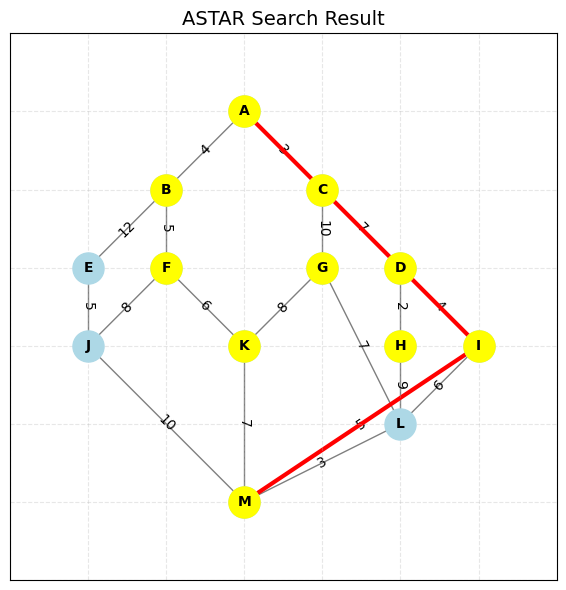

(['A', 'C', 'D', 'I', 'M'],
 ['A', 'C', 'B', 'F', 'D', 'H', 'G', 'K', 'I', 'M'],
 {'time': 9.608268737792969e-05,
  'space': 8,
  'path_cost': 19,
  'nodes_visited': 10})

In [12]:
run_graph_search_example(
    graph=demo_graph,
    algo='astar',
    start='A',
    goal='M',
    heuristic='manhattan'
)

### Interactive Demo

In [13]:
create_graph_search_demo(demo_graph)

## Romania: Interactive Demo

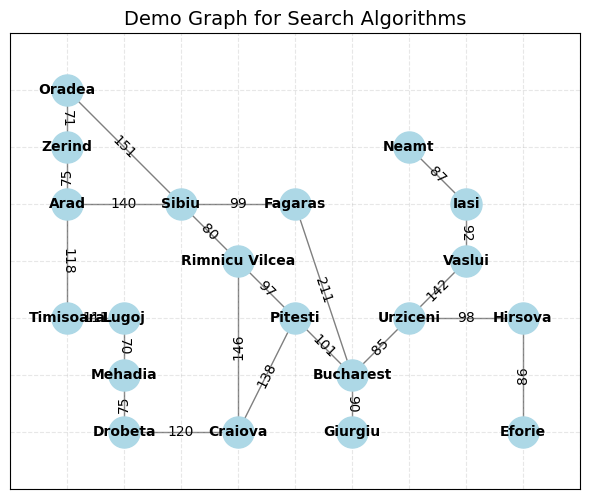

In [14]:
# Create a demo graph
romania_map = create_romania_map()
fig = visualize_graph(romania_map, title="Demo Graph for Search Algorithms")
plt.show()

In [15]:
create_graph_search_demo(romania_map)

# Word Ladder

## 3-letter Game

In [16]:
game3 = WordLadderGame(word_length=3)

print(f"Game created with {len(game3.words)} 3-letter words")
print(f"Graph has {len(game3.graph.nodes)} nodes and {len(game3.graph.edges)} edges")

Loaded 1295 3-letter words from file
Game created with 1295 3-letter words
Graph has 1295 nodes and 12732 edges


In [17]:
START_WORD = "cat"
TARGET_WORD = "dog"

# BFS search
path_bfs, _, metrics_bfs, _ = game3.find_path(
    START_WORD, TARGET_WORD, algorithm="bfs")
print('='*30)
print(f"BFS path ({metrics_bfs['nodes_visited']} nodes visited): {' -> '.join(path_bfs)}")

# DFS search
path_dfs, _, metrics_dfs, _ = game3.find_path(
    START_WORD, TARGET_WORD, algorithm="dfs")
print('='*30)
print(f"DFS path ({metrics_dfs['nodes_visited']} nodes visited): {' -> '.join(path_dfs)}")

# A* search with different heuristics
path_astar, _, metrics_astar, _ = game3.find_path(
    START_WORD, TARGET_WORD, algorithm="astar", heuristic=hamming_distance
)
print('='*30)
print(f"A* with Hamming distance ({metrics_astar['nodes_visited']} nodes visited): {' -> '.join(path_astar)}")

path_letter, _, metrics_letter, _ = game3.find_path(
    START_WORD, TARGET_WORD, algorithm="astar", heuristic=letter_set_difference
)
print('='*30)
print(f"A* with Letter set difference ({metrics_letter['nodes_visited']} nodes visited): {' -> '.join(path_letter)}")

path_vowel, _, metrics_vowel, _ = game3.find_path(
    START_WORD, TARGET_WORD, algorithm="astar", heuristic=vowel_consonant_difference
)
print('='*30)
print(f"A* with Vowel-consonant (poor heuristic) ({metrics_vowel['nodes_visited']} nodes visited): {' -> '.join(path_vowel)}")

BFS path (954 nodes visited): cat -> cag -> dag -> dog
DFS path (1196 nodes visited): cat -> nat -> vat -> vau -> hau -> hay -> lay -> say -> sab -> saj -> sat -> oat -> fat -> fan -> ian -> inn -> ing -> ink -> irk -> ire -> ide -> ido -> ito -> ijo -> ibo -> iba -> ila -> iwa -> hwa -> mwa -> mya -> pya -> pyx -> pix -> pit -> ait -> apt -> aht -> ahu -> abu -> ayu -> kyu -> kru -> kra -> fra -> fry -> ory -> orc -> ort -> art -> ast -> ust -> ist -> iso -> iyo -> ino -> ind -> and -> add -> awd -> awe -> ave -> ace -> ape -> ope -> ole -> olm -> ohm -> oho -> who -> tho -> two -> lwo -> lao -> dao -> dap -> dak -> dan -> dah -> wah -> wae -> wat -> yat -> yam -> fam -> fum -> gum -> gym -> gim -> him -> hin -> din -> dig -> mig -> tig -> teg -> tug -> dug -> hug -> hog -> jog -> jow -> yow -> yox -> yoy -> boy -> bot -> boo -> bor -> mor -> mou -> mon -> non -> kon -> fon -> fop -> sop -> sok -> suk -> sur -> lur -> jur -> bur -> ber -> aer -> oer -> her -> eer -> ger -> grr -> gor 

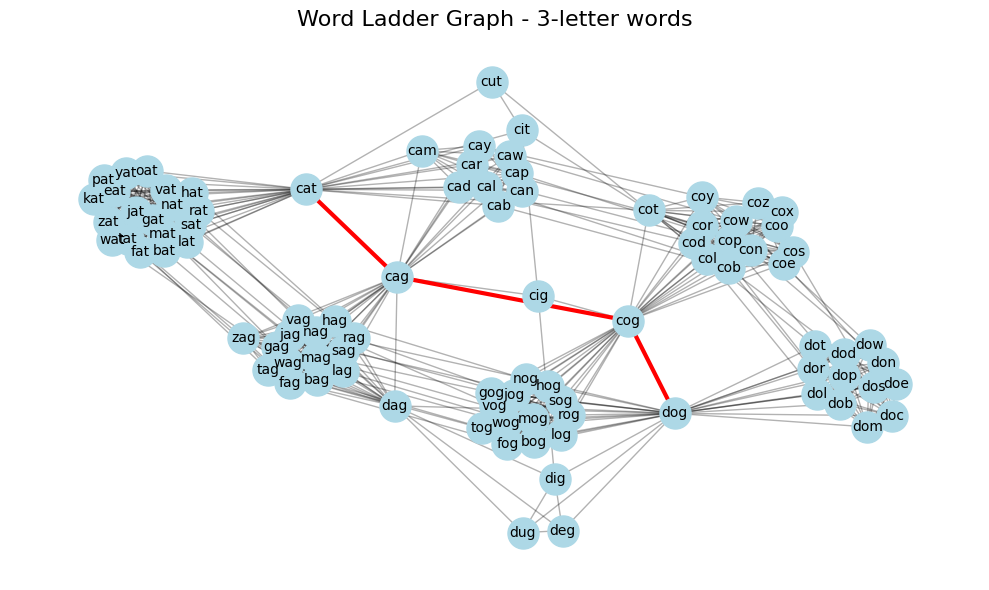

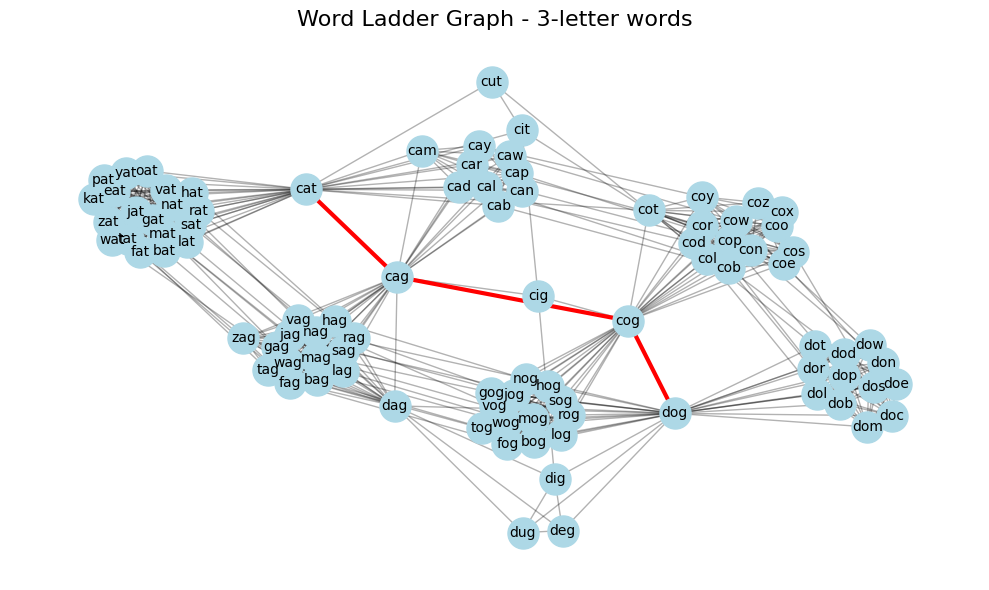

In [18]:
# Visualize the word graph with the found path
game3.visualize_word_graph(highlighted_path=path_astar)

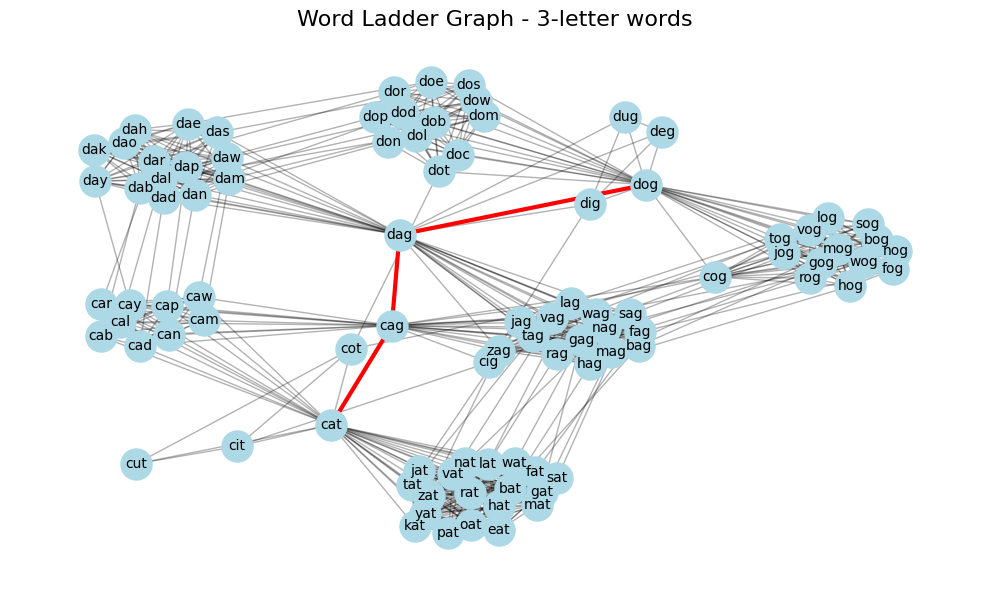

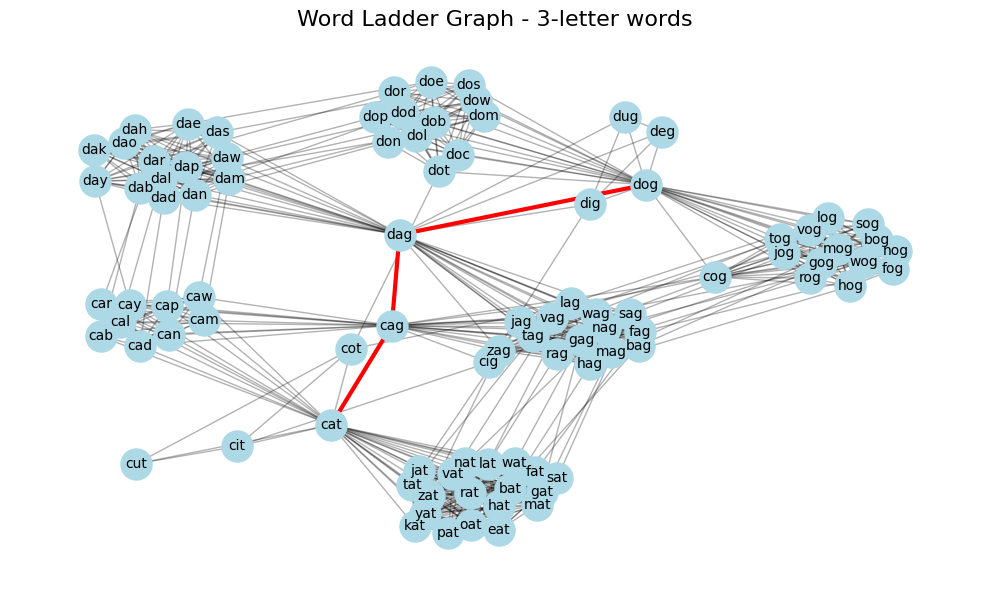

In [19]:
game3.visualize_word_graph(highlighted_path=path_bfs)

## 4-letter Game

In [20]:
# Create a 4-letter word game
game4 = WordLadderGame(word_length=4)
print(f"\nCreated game with {len(game4.words)} 4-letter words")

Loaded 4995 4-letter words from file

Created game with 4995 4-letter words


Path from 'cost' to 'goal': cost -> coat -> coal -> goal


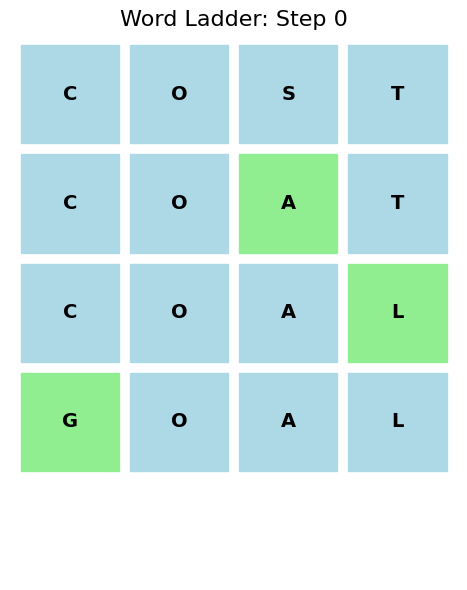

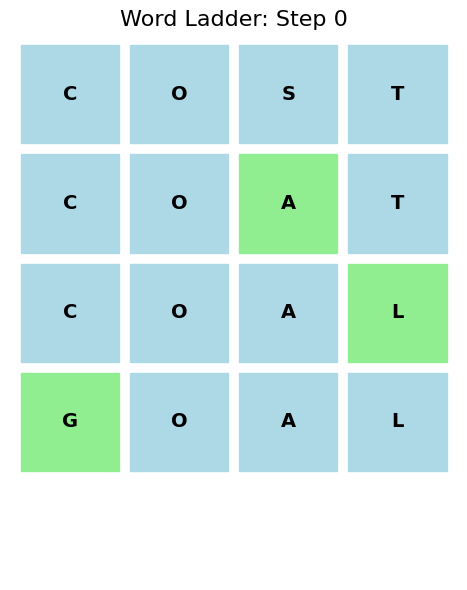

In [21]:
START_WORD4 = 'cost'
TARGET_WORD4 = 'goal'

path4, _, metrics4, _ = game4.find_path(
    START_WORD4, TARGET_WORD4, algorithm="astar", heuristic=hamming_distance
)
print(
    f"Path from '{START_WORD4}' to '{TARGET_WORD4}': {' -> '.join(path4 if path4 else ['No path found'])}")
game4.visualize_word_change(START_WORD4, path4)

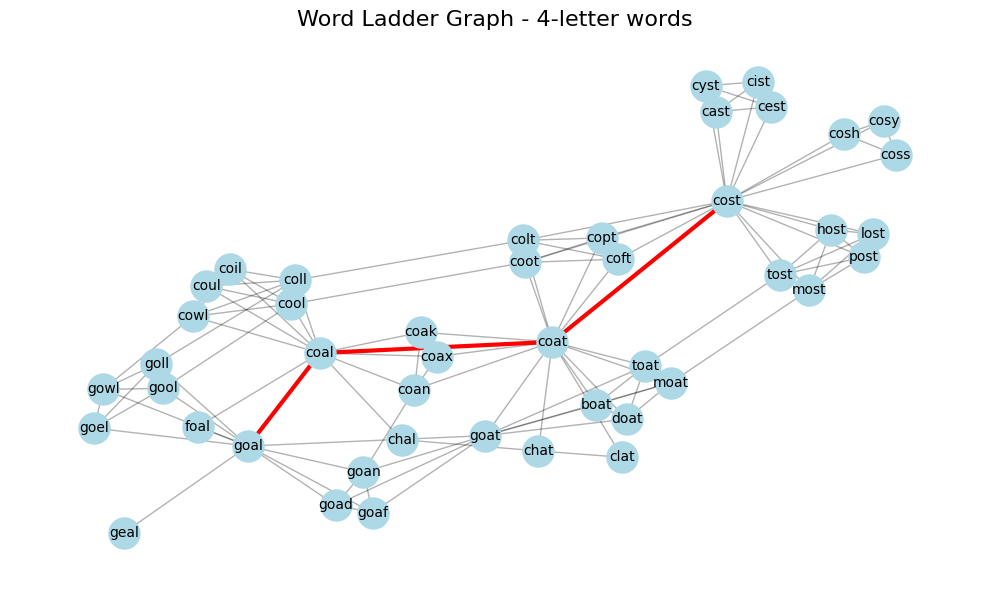

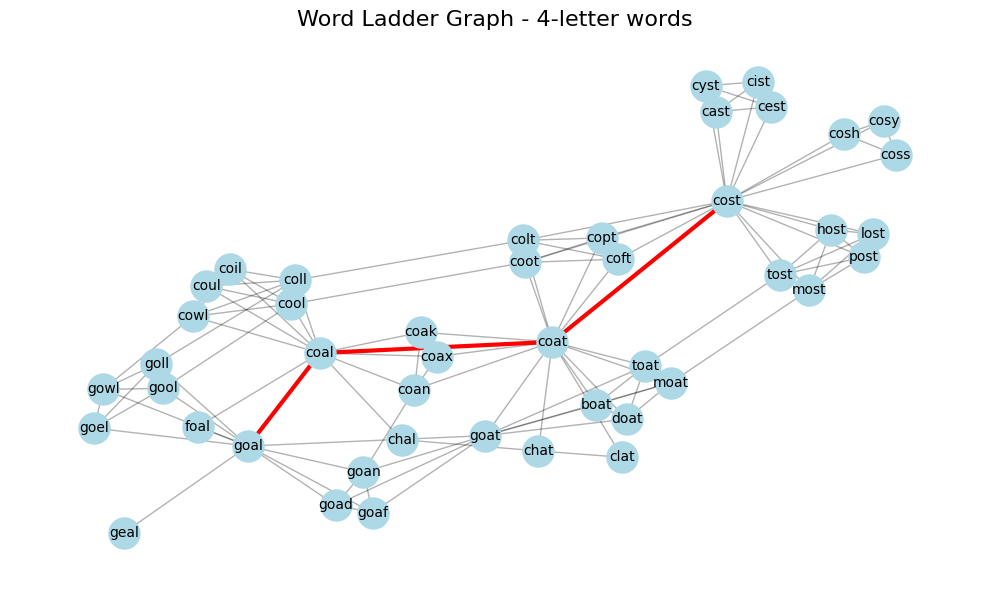

In [22]:
game4.visualize_word_graph(highlighted_path=path4)

Path from 'quiz' to 'game': quiz -> quin -> ruin -> rain -> dain -> damn -> dame -> game


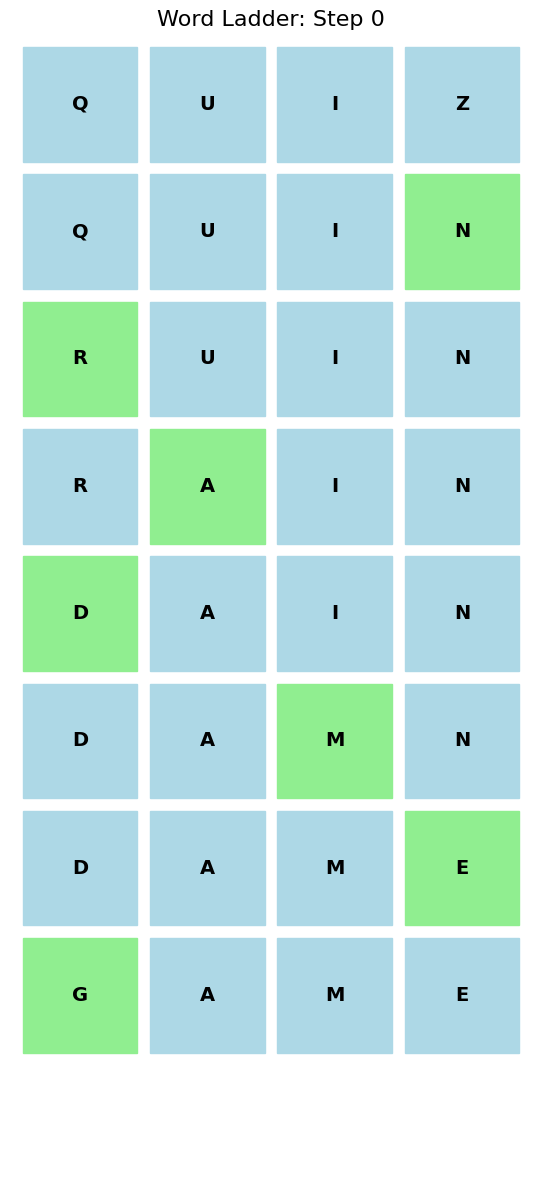

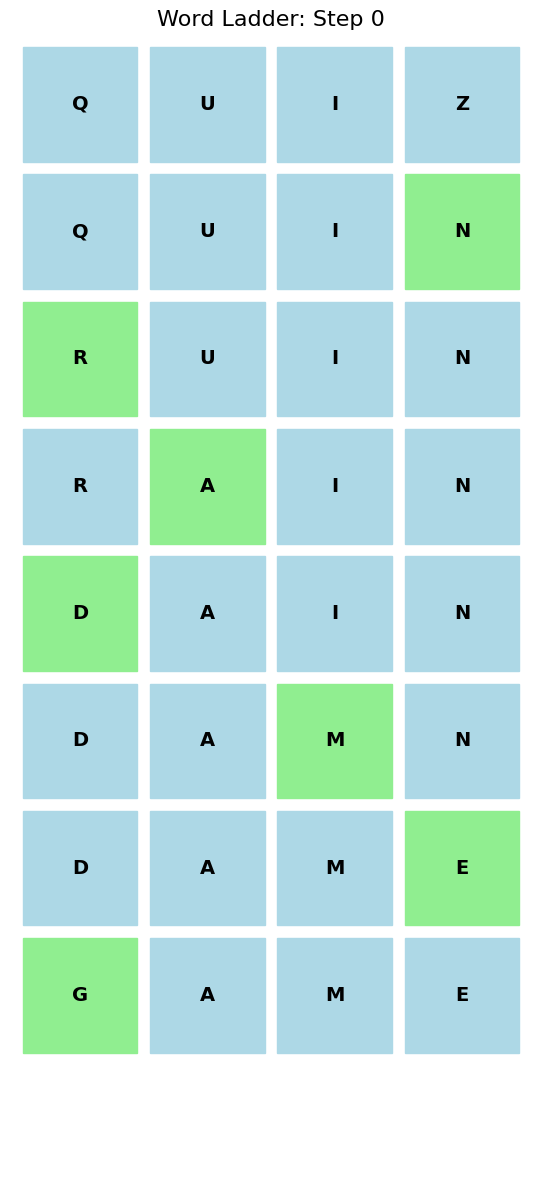

In [23]:
# START_WORD4 = 'cost'
# TARGET_WORD4 = 'goal'

START_WORD4 = 'quiz'
TARGET_WORD4 = 'game'

path4, _, metrics4, _ = game4.find_path(
    START_WORD4, TARGET_WORD4, algorithm="astar", heuristic=hamming_distance
)
print(f"Path from '{START_WORD4}' to '{TARGET_WORD4}': {' -> '.join(path4 if path4 else ['No path found'])}")
game4.visualize_word_change(START_WORD4, path4)


Visualizing the word graph with the found path:


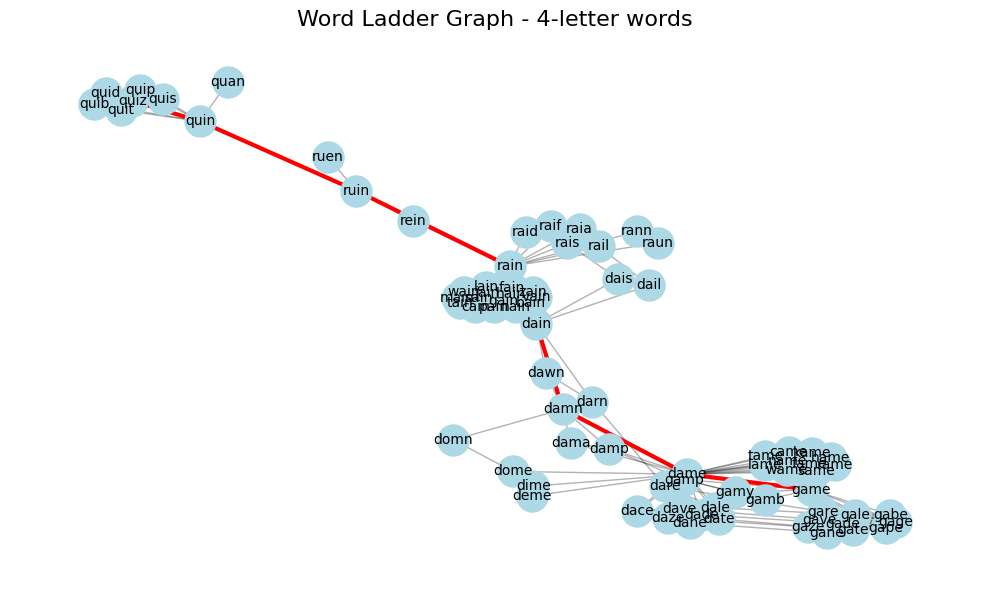

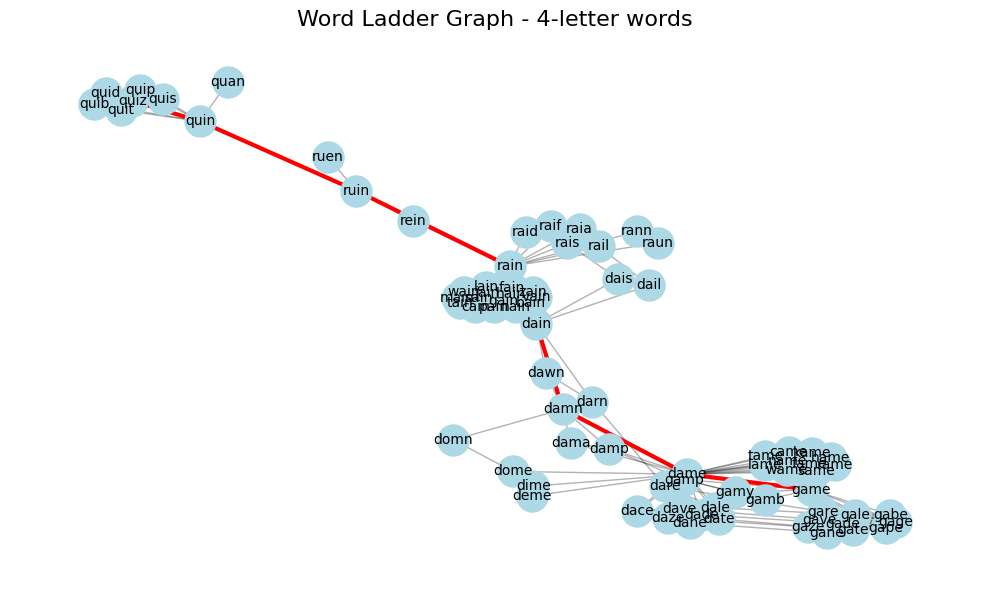

In [24]:
# Visualize the word graph with the found path
print("\nVisualizing the word graph with the found path:")
game4.visualize_word_graph(highlighted_path=path4)

## 5-letter Game

In [25]:
# Create a 5-letter word game
game5 = WordLadderGame(word_length=5)
print(f"\nCreated game with {len(game5.words)} 5-letter words")

Loaded 9972 5-letter words from file

Created game with 9972 5-letter words


Path from 'world' to 'peace': world -> would -> mould -> moule -> mouse -> douse -> douce -> pouce -> ponce -> pence -> peace


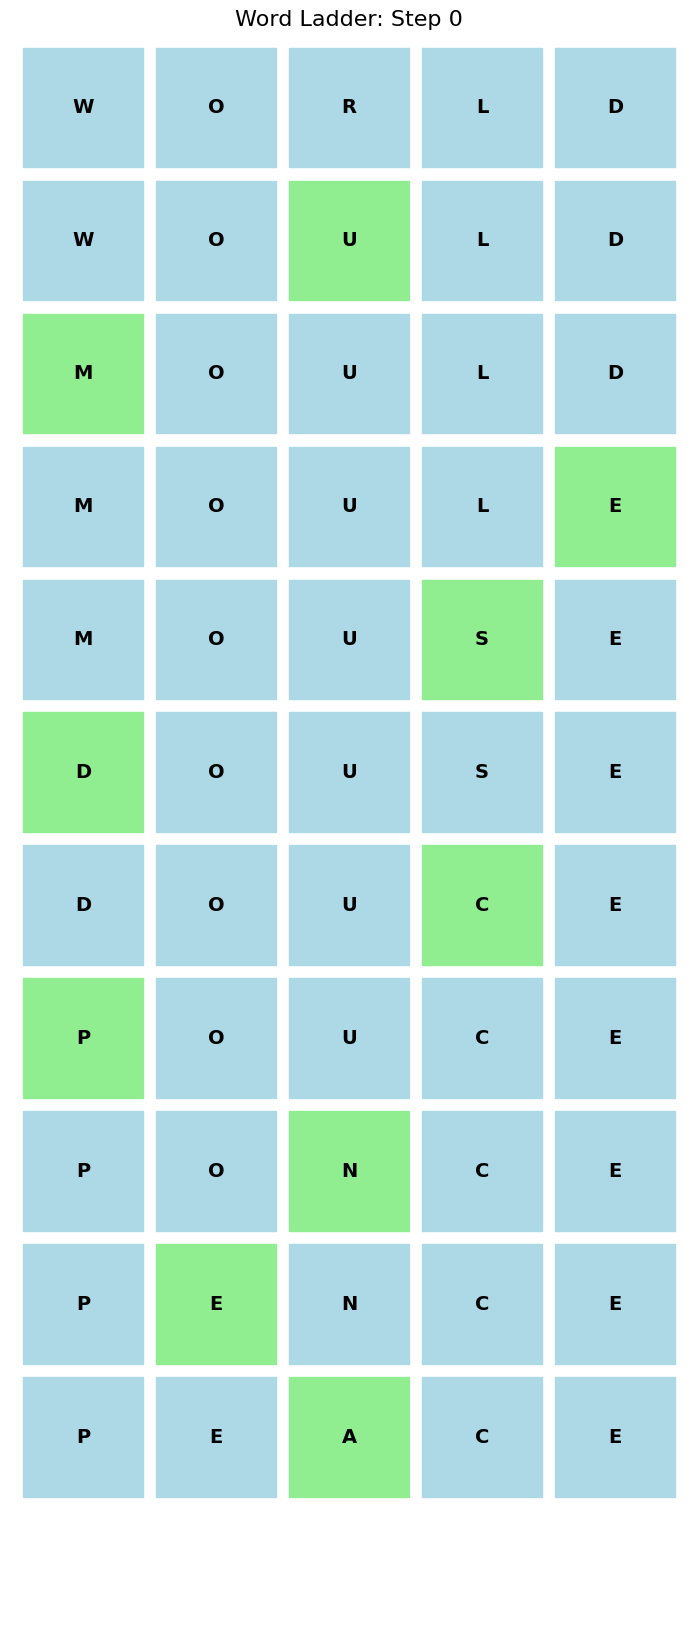

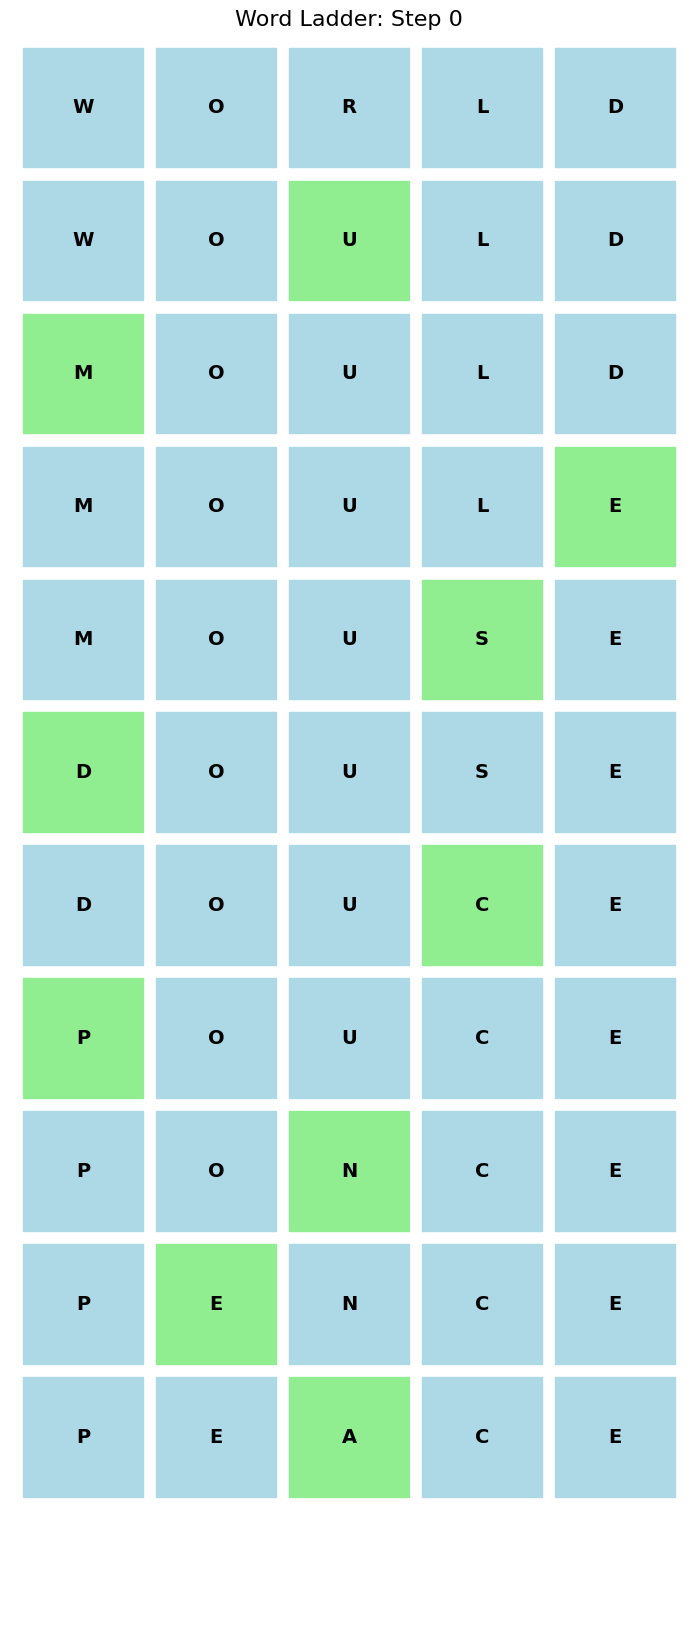

In [26]:
START_WORD5 = 'world'
TARGET_WORD5 = 'peace'

path5, _, metrics5, _ = game5.find_path(
    START_WORD5, TARGET_WORD5, algorithm="astar", heuristic=hamming_distance
)
print(f"Path from '{START_WORD5}' to '{TARGET_WORD5}': {' -> '.join(path5 if path5 else ['No path found'])}")
game5.visualize_word_change(START_WORD5, path5)

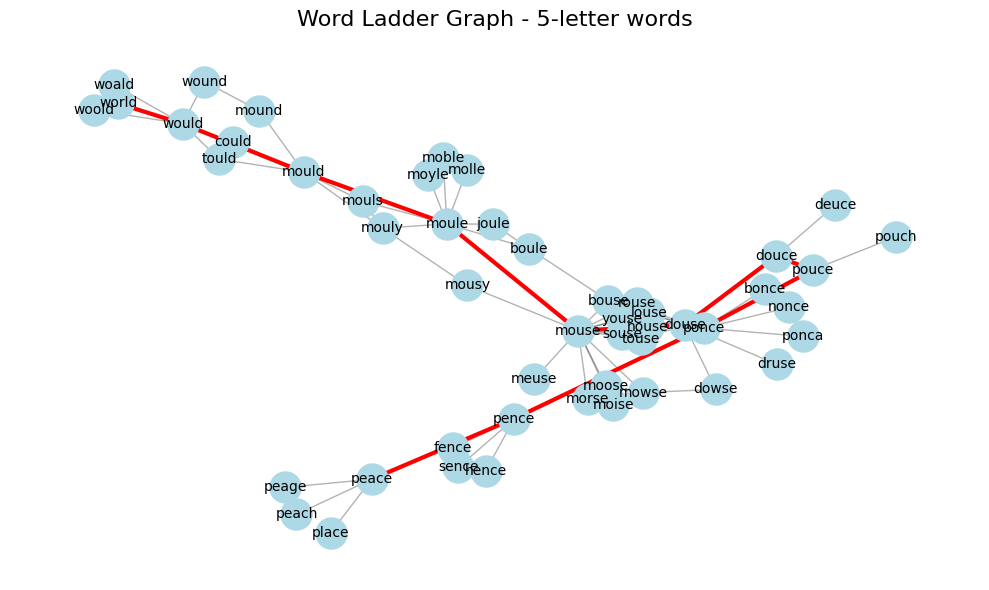

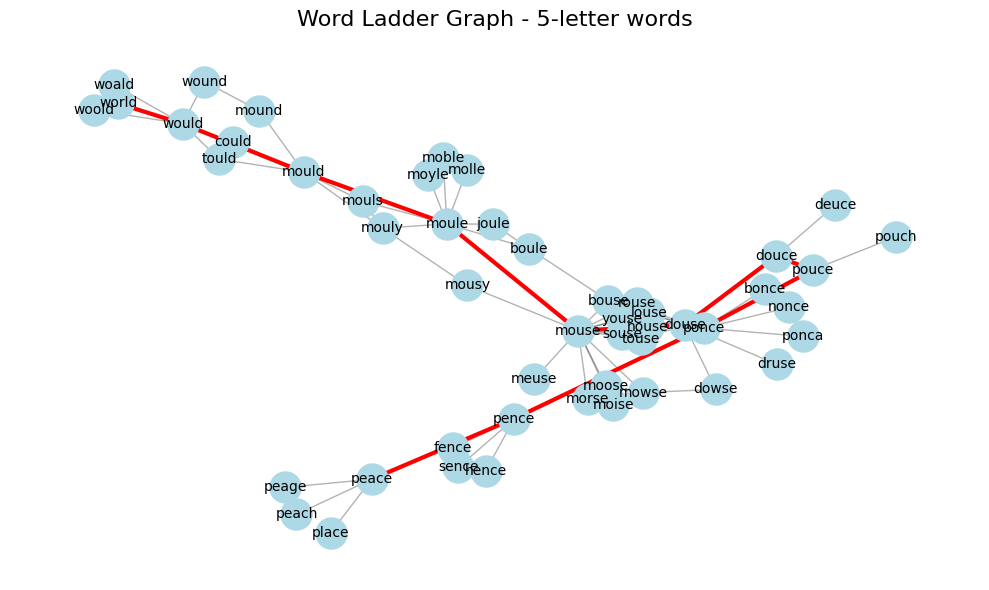

In [27]:
game5.visualize_word_graph(highlighted_path=path5)

## Interactive Demo

In [28]:
game3 = WordLadderGame(word_length=3)

start_safe = 'cat'
target_safe = 'dog'

# Create an interactive demo
print("\nCreating an interactive demo:")
create_word_ladder_demo(game3, start_word=start_safe, target_word=target_safe)

Loaded 1295 3-letter words from file

Creating an interactive demo:


In [29]:
game3 = WordLadderGame(word_length=3)

start_safe = 'ape'
target_safe = 'man'

# Create an interactive demo
print("\nCreating an interactive demo:")
create_word_ladder_demo(game3, start_word=start_safe, target_word=target_safe)

Loaded 1295 3-letter words from file

Creating an interactive demo:


# N-Puzzle

## Create Puzzle

N-PUZZLE DEMONSTRATION
8-Puzzle (Random Solvable State):


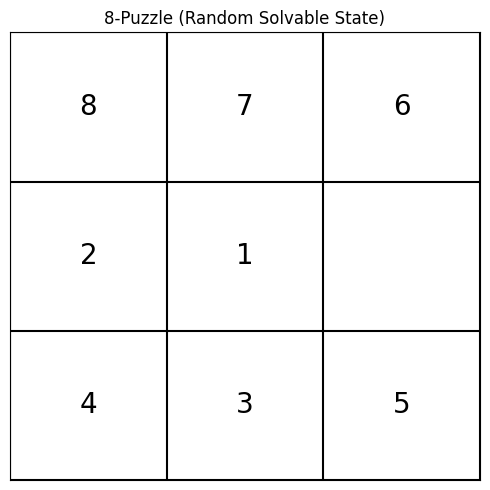

In [30]:
print("N-PUZZLE DEMONSTRATION")
print("=====================")

# Create example puzzles
puzzle_8 = NPuzzle(size=3)
puzzle_15 = NPuzzle(size=4)

# Visualize the puzzles
print("8-Puzzle (Random Solvable State):")
fig1 = puzzle_8.visualize(title="8-Puzzle (Random Solvable State)")
plt.show()


8-Puzzle (Goal State):


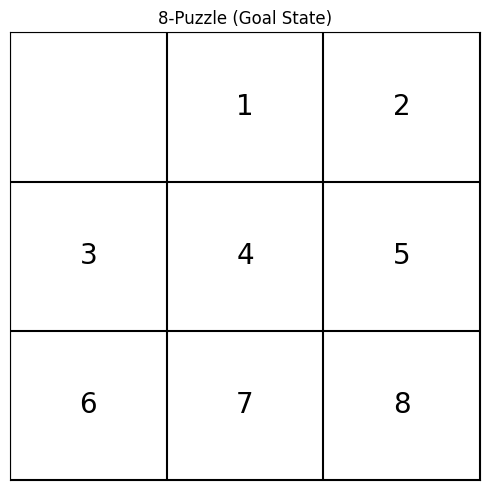

In [31]:
print("\n8-Puzzle (Goal State):")
fig2 = puzzle_8.visualize(puzzle_8.goal_state, title="8-Puzzle (Goal State)")
plt.show()


15-Puzzle (Random Solvable State):


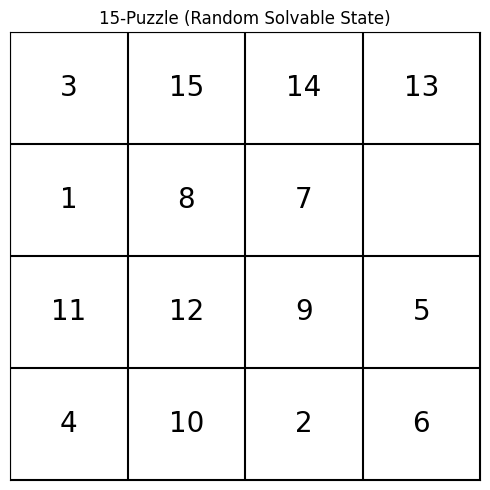

In [32]:
print("\n15-Puzzle (Random Solvable State):")
fig3 = puzzle_15.visualize(title="15-Puzzle (Random Solvable State)")
plt.show()

## Demo Puzzle

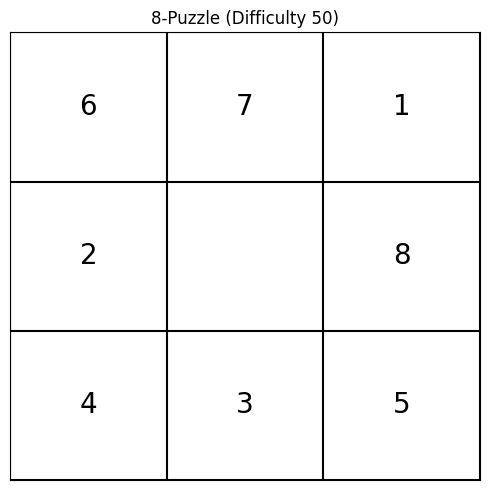

In [33]:
# Create a simpler puzzle for demonstration
demo_puzzle = create_specific_puzzle(size=3, difficulty=50)
fig5 = demo_puzzle.visualize(title="8-Puzzle (Difficulty 50)")
plt.show()

In [34]:
# Run A* search on the puzzle
print("\nRunning A* search with Manhattan distance heuristic...")
path, actions, metrics, states = n_puzzle_search(
    demo_puzzle, 'astar', 'manhattan', max_iterations=1000
)


Running A* search with Manhattan distance heuristic...


In [35]:
print(f"✓ Solution found in {len(path) - 1} moves!")
print(f"Actions: {', '.join(actions)}")
print(f"Time taken: {metrics['time']:.6f} seconds")
print(f"Max frontier size: {metrics['space']}")
print(f"States visited: {metrics['states_visited']}")
print(f"Iterations: {metrics['iterations']}")

# Show the final state
print("\nFinal State (Goal):")
fig6 = demo_puzzle.visualize(path[-1], title="A* Search - Final State (Goal)")
plt.show()

✓ Solution found in -1 moves!
Actions: 
Time taken: 0.006726 seconds
Max frontier size: 614
States visited: 1614
Iterations: 1000

Final State (Goal):


IndexError: list index out of range

## Interactive

In [11]:
create_n_puzzle_demo(
    size=3,
    difficulty=5
)